In [ ]:
# importing the libraries
from sklearn.model_selection import cross_val_score, ShuffleSplit, LeavePOut, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the iris dataset
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# converting the above data into pandas dataframe
dataset = pd.DataFrame(data = iris_dataset.data, columns = iris_dataset.feature_names)
dataset['target'] = iris_dataset.target
dataset.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# This shows that our dataset is balanced.
dataset['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
# shows the shape of the dataset. In this case, it is having 150 rows, and 5 columns.
dataset.shape

(150, 5)

In [ ]:
# shows the information about the dataset, like how many variables are there, null values, and dtype of each column.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


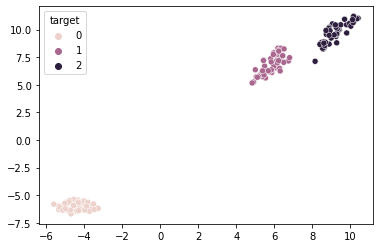

In [ ]:
# tsne scatterplot
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=2, perplexity=50, n_iter=10000)
tsne_data = model.fit_transform(dataset)

sns.scatterplot(tsne_data[:,0], tsne_data[:,1], hue = dataset['target'], legend='full')

From TSNE Scatter Plot, we can see that we have three clusters i.e 0, 1, 2.

The target variable has three distinct values.

In [ ]:
predictor_variables = dataset.drop(columns=['target'], axis=1)
target_variables = dataset['target']

In [ ]:
knn_classifer = KNeighborsClassifier()

test_size = 0.2
train_size = 0.6 
splits = 20

# **Monte Carlo Cross-Validation**
Monte Carlo cross-validation simply splits the N data points into the two subsets nt (training) and nv (validation) by sampling, without replacement. The model is then trained on subset nt and validated on subset nv.

In [ ]:
monte_carlo = ShuffleSplit(test_size = test_size, train_size = train_size, n_splits = splits)

monte_carlo_cv = cross_val_score(knn_classifer, predictor_variables, target_variables, cv = monte_carlo)
mc_score = monte_carlo_cv.mean()

# **Leave-P-Out Cross-Validation**
Leave p-out cross-validation is an exhaustive cross-validation technique, that involves using p observation as validation data, and remaining data is used to train the model. \
In this case, I've taken p = 2 also known as leave-pair-out cross-validation.

In [ ]:
leave_p_out = LeavePOut(p = 2)

leave_p_out_cv = cross_val_score(knn_classifer, predictor_variables, target_variables, cv = leave_p_out)
lpo_score = leave_p_out_cv.mean()

# **Stratified 3-Fold Cross-Validation**
The dataset is partitioned into k groups or folds such that the validation data has an equal number of instances of target class label.

In [ ]:
stratified_3_fold = StratifiedKFold(n_splits=3, random_state=0, shuffle = True)

stratified_3_fold_cv = cross_val_score(knn_classifer, predictor_variables, target_variables, cv = stratified_3_fold)
statified_score = stratified_3_fold_cv.mean()

# **HoldOut Cross-validation**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictor_variables, target_variables, test_size=0.15, random_state=3)

knn_classifer.fit(x_train, y_train)
hold_out_cv = knn_classifer.score(x_test, y_test)

In [ ]:
# Combined CV_Score Table
scores = {'Cross Validation Algorithm': ['Monte Carlo Cross-Validation', 'Leave P Out Cross-Validation', 'Stratified 3-fold Cross-Validation', 'Hold Out Cross-Validation'],
        'CV-Score': [mc_score, lpo_score, statified_score, hold_out_cv]}

score_table = pd.DataFrame(scores)
score_table

,Cross Validation Algorithm,CV-Score
0,Monte Carlo Cross-Validation,0.968333
1,Leave P Out Cross-Validation,0.966532
2,Stratified 3-fold Cross-Validation,0.960000
3,Hold Out Cross-Validation,0.956522


# **Cross validation** is mostly used in machine learning to evaluate a model's performance on unseen data.

From the definition, if the CV-score is more, that means the model is performing good on the test data or unseen data.

From the table above, we can say that for this dataset and KNN Algorithm, the Monte Carlo Cross-Validation is a good option to go with, as it has the highest cross-validation score among all the other types.